In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from openTSNE import TSNE as openTSNE
import umap as ump
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

In [12]:
data = pd.read_csv('../data/tox24_train.csv')
data.head()

,SMILES,activity
0,CC1(C)[C@@H]2C[C@H]1C(=C)CC2,12.3
1,COC(=O)C(C)OC1=CC=C(OC2=CC=C(Cl)C=C2Cl)C=C1,94.1
2,CCCCCCCCCCCCCC(=O)OCC(O)CO,38.1
3,CC(=O)O[C@@H]1C[C@@H]2CC[C@@]1(C)C2(C)C,11.8
4,CCCCCCCCCC=CCC1CC(=O)OC1=O,98.4


In [13]:
# convert smiles to morgan fingerprints and do the tSNE plot
def smiles_to_fp(smiles):
    '''Convert SMILES to Morgan fingerprints'''
    return np.array([AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=1024) for s in smiles])

fps = smiles_to_fp(data.SMILES)

In [36]:
def plot_2d_space(fps):
    tsne = TSNE(n_components=2)
    pca = PCA(n_components=2)
    umap = ump.UMAP(n_components=2)

    fps_tsne = tsne.fit_transform(fps)
    fps_pca = pca.fit_transform(fps)
    fps_umap = umap.fit_transform(fps)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].scatter(fps_tsne[:, 0], fps_tsne[:, 1], s=5)
    ax[0].set_title('tSNE')
    ax[0].set_xlabel(r'$\rm tSNE 1$', fontsize=13)
    ax[0].set_ylabel(r'$\rm tSNE 2$', fontsize=13)

    ax[1].scatter(fps_pca[:, 0], fps_pca[:, 1], s=5)
    ax[1].set_title('PCA')
    ax[1].set_xlabel(r'$\rm PCA 1$', fontsize=13)
    ax[1].set_ylabel(r'$\rm PCA 2$', fontsize=13)

    ax[2].scatter(fps_umap[:, 0], fps_umap[:, 1], s=5)
    ax[2].set_title('UMAP')
    ax[2].set_xlabel(r'$\rm UMAP 1$', fontsize=13)
    ax[2].set_ylabel(r'$\rm UMAP 2$', fontsize=13)

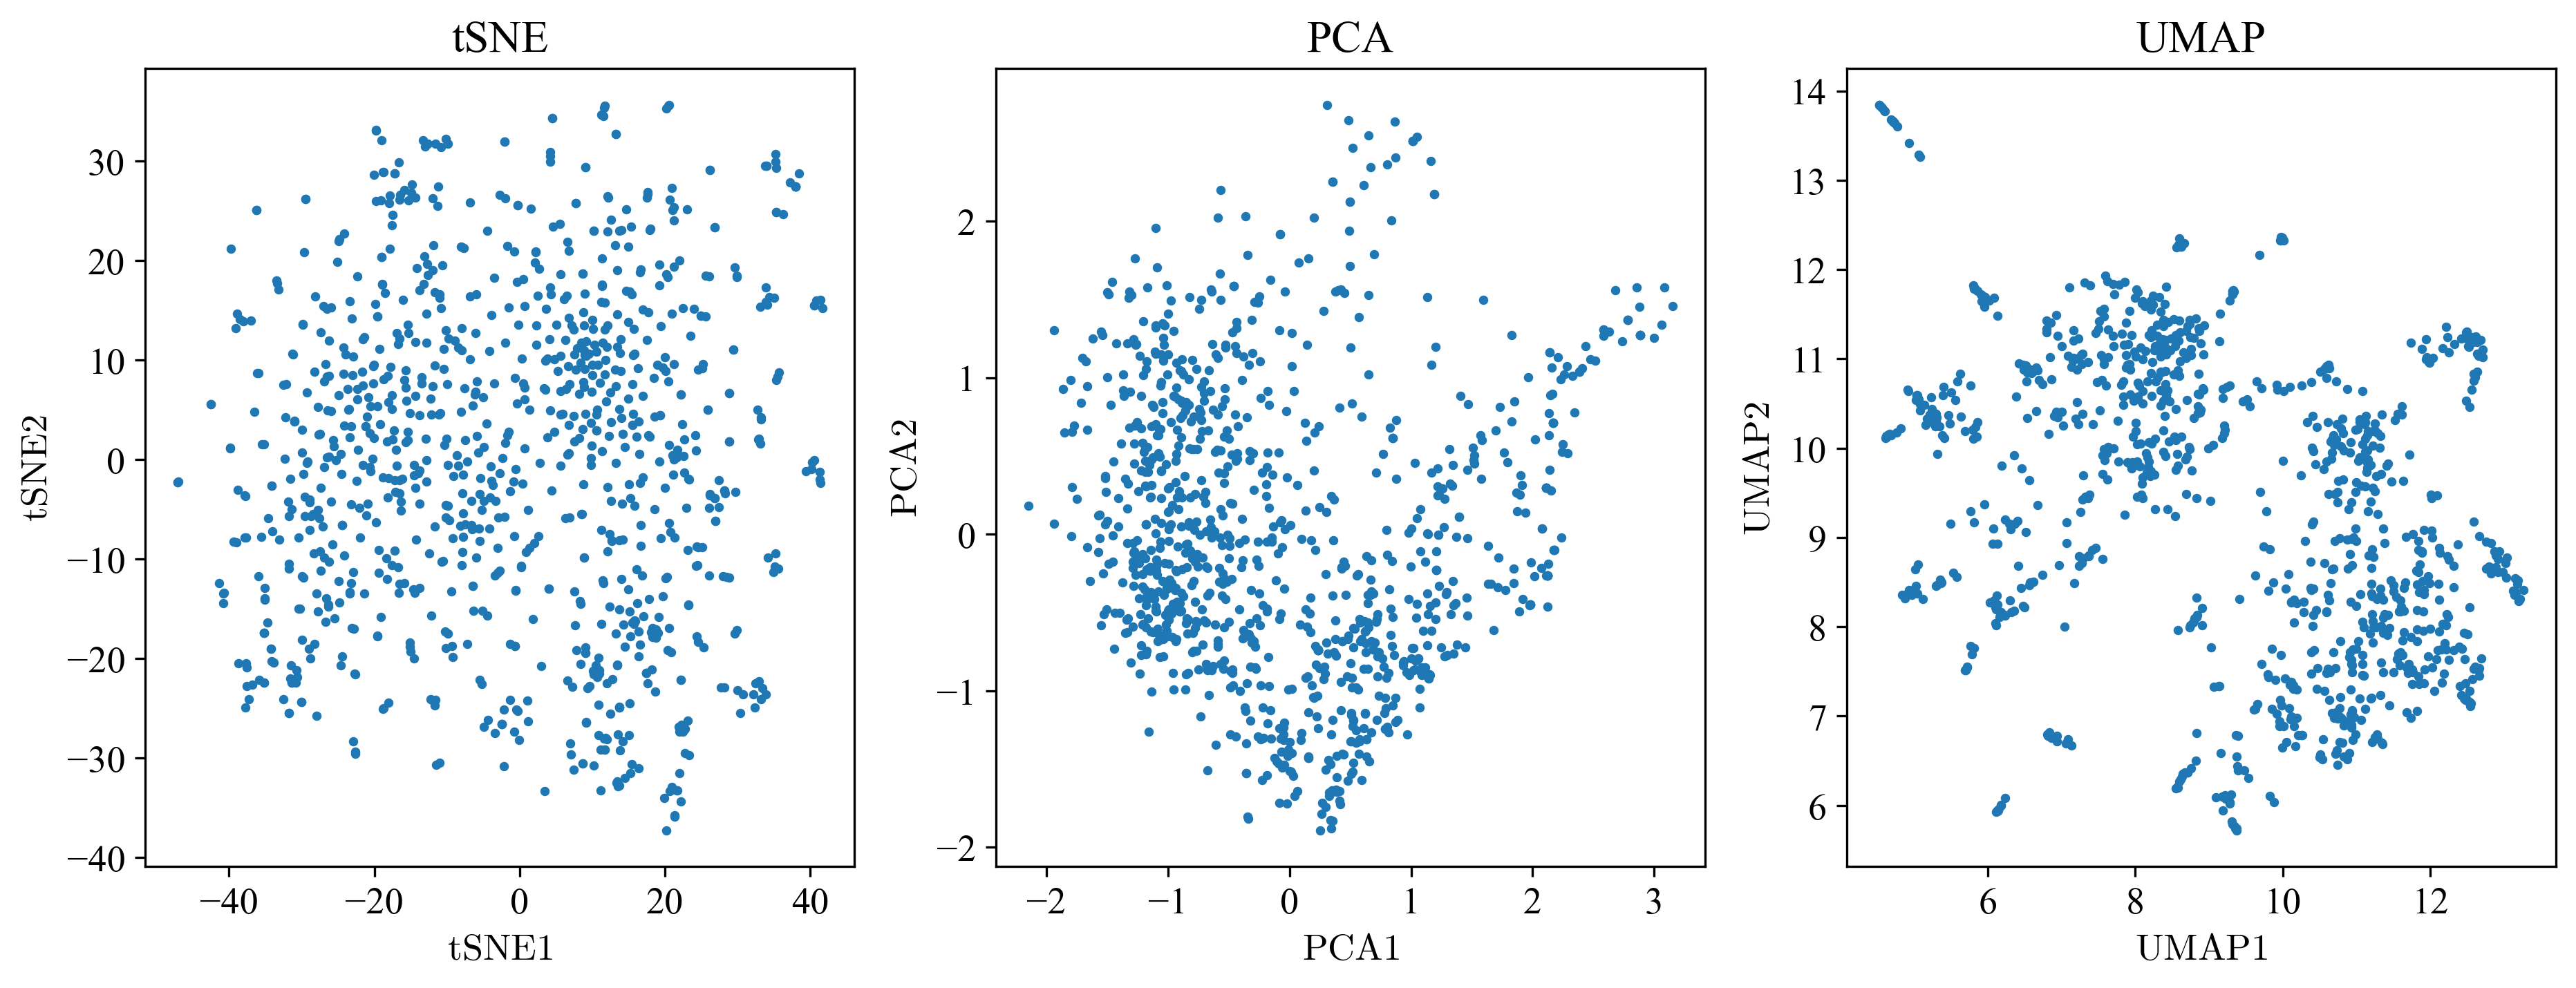

In [37]:
plot_2d_space(fps)

# visualize both train and test

In [39]:
# map with the test data
data_test = pd.read_csv('../data/tox24_test.csv')

In [44]:
def plot_2d_space(fps_train, fps_test):

    # concatenate the train and test data
    fps_all = np.concatenate([fps_train, fps_test])


    tsne = openTSNE()
    embedding = tsne.fit(fps_train)
    pca = PCA(n_components=2)
    pca.fit(fps_train)
    umap = ump.UMAP(n_components=2)
    umap.fit(fps_train)

    fps_tsne = embedding.transform(fps_all)
    fps_pca = pca.transform(fps_all)
    fps_umap = umap.transform(fps_all)


    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].scatter(fps_tsne[:len(fps)][:, 0], fps_tsne[:len(fps)][:, 1], color='g', label='Train', marker='o')
    ax[0].scatter(fps_tsne[len(fps):][:, 0], fps_tsne[len(fps):][:, 1], color='b', label='Test', marker='x')

    ax[0].set_title('tSNE')
    ax[0].set_xlabel(r'$\rm tSNE 1$', fontsize=13)
    ax[0].set_ylabel(r'$\rm tSNE 2$', fontsize=13)

    ax[1].scatter(fps_pca[:len(fps)][:, 0], fps_pca[:len(fps)][:, 1], color='g', label='Train', marker='o')
    ax[1].scatter(fps_pca[len(fps):][:, 0], fps_pca[len(fps):][:, 1], color='b', label='Test', marker='x')

    ax[1].set_title('PCA')
    ax[1].set_xlabel(r'$\rm PCA 1$', fontsize=13)
    ax[1].set_ylabel(r'$\rm PCA 2$', fontsize=13)

    ax[2].scatter(fps_umap[:len(fps)][:, 0], fps_umap[:len(fps)][:, 1], color='g', label='Train', marker='o')
    ax[2].scatter(fps_umap[len(fps):][:, 0], fps_umap[len(fps):][:, 1], color='b', label='Test', marker='x')
    
    ax[2].set_title('UMAP')
    ax[2].set_xlabel(r'$\rm UMAP 1$', fontsize=13)
    ax[2].set_ylabel(r'$\rm UMAP 2$', fontsize=13)
    ax[2].legend()

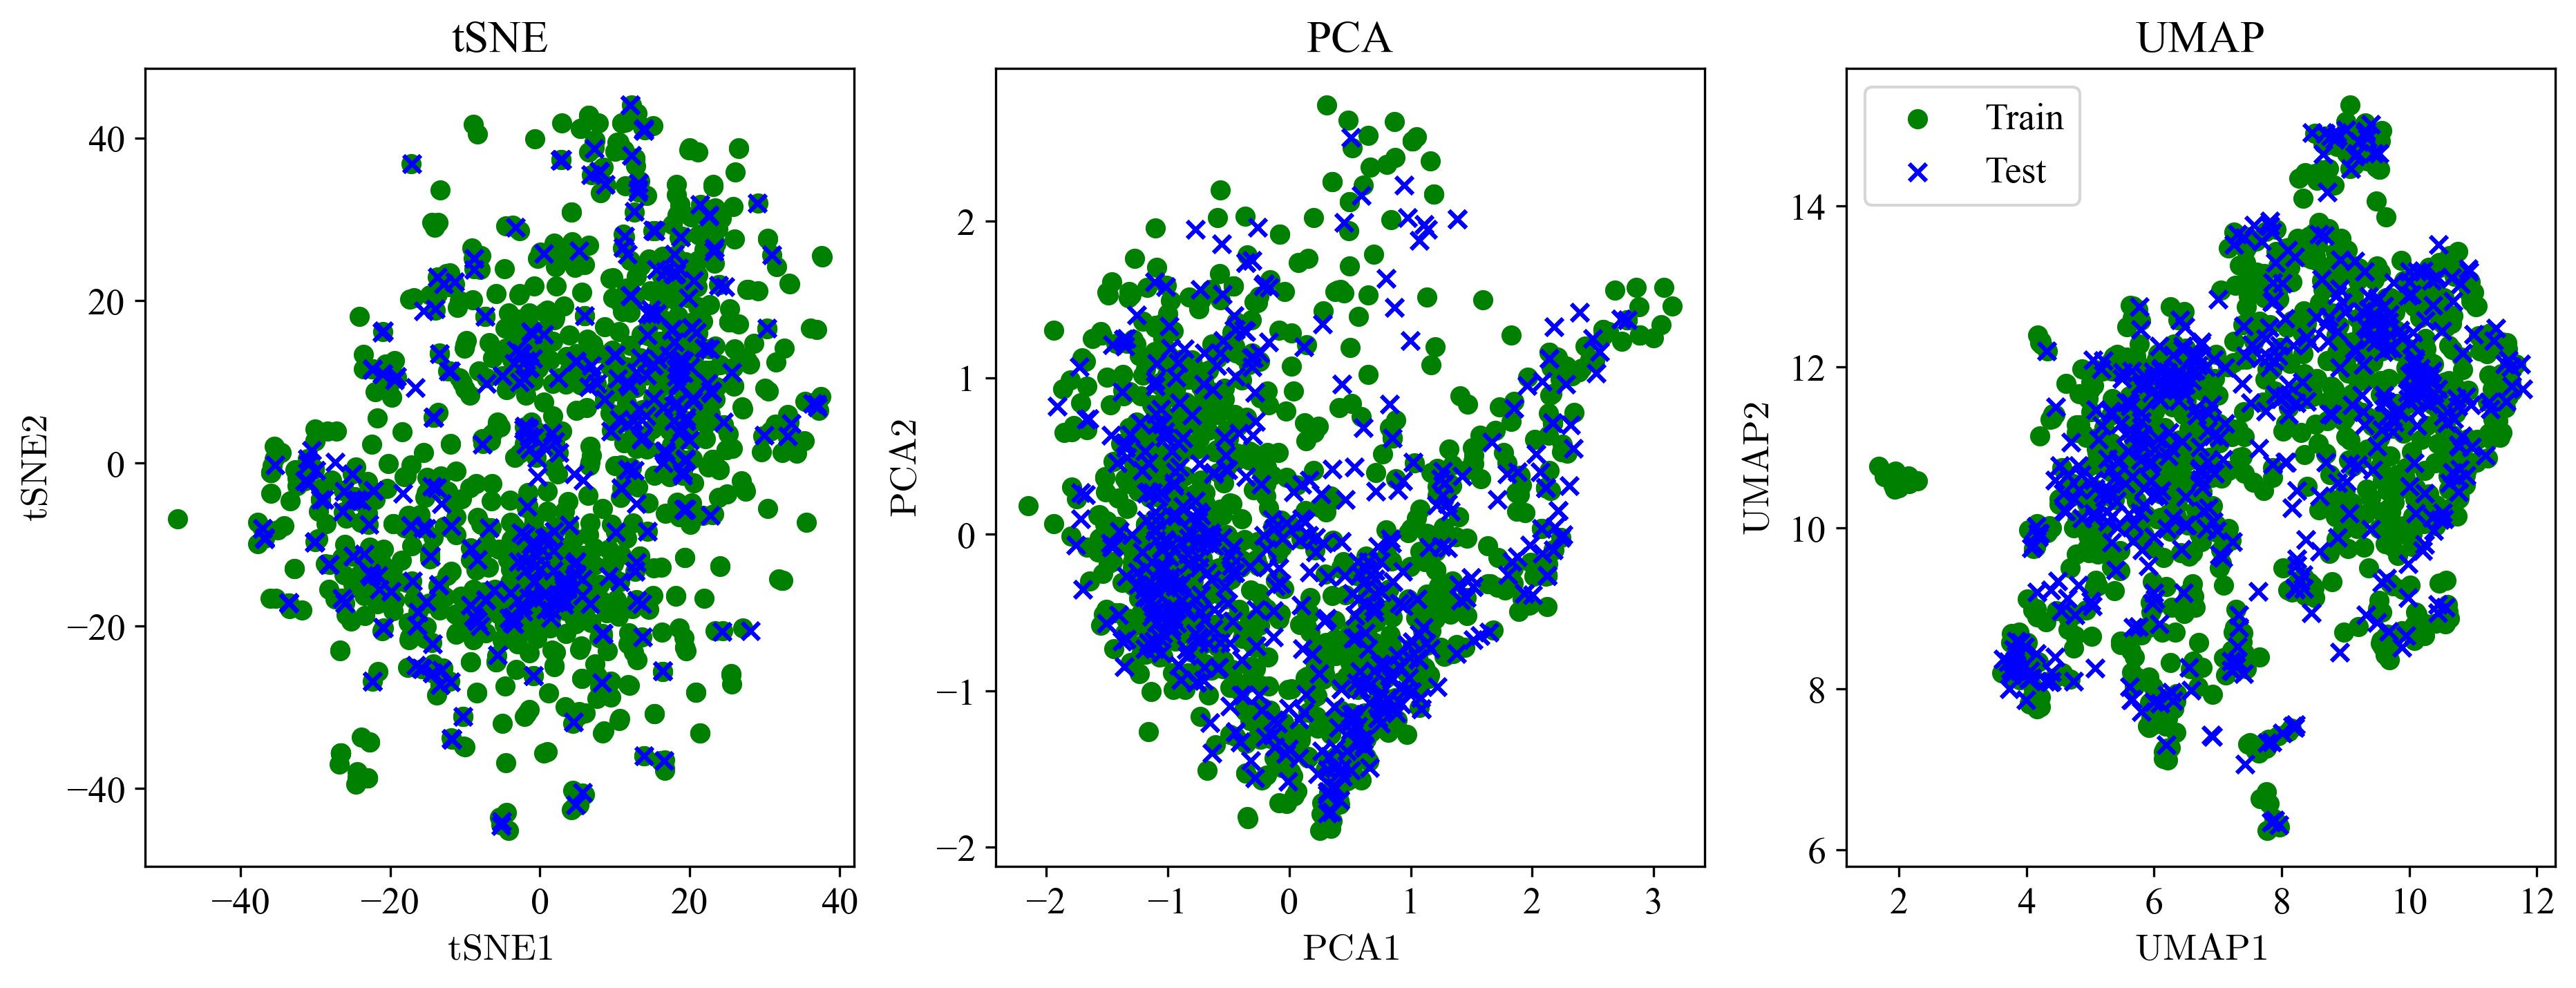

In [45]:
fps_test = smiles_to_fp(data_test.SMILES)

plot_2d_space(fps, fps_test)

Conclusion: Both the train and test sample the same distribution and very similar!